<a href="https://colab.research.google.com/github/EmanoneL/data_analysis_pet_project/blob/main/%D0%A1lassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Импорт и подключение библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest # Критерий Колмогорова-Смирнова

In [ ]:
!pip install ucimlrepo
!pip install catboost

### Загрузка данных

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

In [ ]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
X['season'].value_counts()

,count
season,
a,30177
u,22898
w,5267
s,2727


Этот набор данных представляет собой очищенную версию исходного набора данных грибов для двоичной классификации, доступного в библиотеке UCI. Он содержит 9 столбцов:

Диаметр крышки
Форма крышки
Жаберное прикрепление
Цвет жабр
Высота штока
Ширина штока
Цвет стебля
Сезон
Целевой класс: съедобно или нет?
Целевой класс содержит два значения — 0 или 1, где 0 относится к съедобному, а 1 — к ядовитому.

In [ ]:
# Проверяет близость к нормальному распределению для фичи по критерию Колмогорова-Смирнова
def checkStandart(df, feature_name):
  data = (df[feature_name] - df[feature_name].mean()) / df[feature_name].std()

  # Выполняем K-S тест для проверки нормальности
  stat, p_value = kstest(data, 'norm')
  print(f'Statistic: {stat}, p-value: {p_value}')

  # Интерпретация результата
  alpha = 0.05
  if p_value > alpha:
      print('Распределение близко к нормальному (не отклоняем H0)')
  else:
      print('Распределение отличается от нормального (отклоняем H0)')

### Дискриптивный анализ


In [ ]:
#Загрузка данных
all_data = pd.read_csv('/content/mushroom_cleaned.csv')
all_data.head(20)


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'cap-shape'}>,
        <Axes: title={'center': 'gill-attachment'}>],
       [<Axes: title={'center': 'gill-color'}>,
        <Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>],
       [<Axes: title={'center': 'stem-color'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

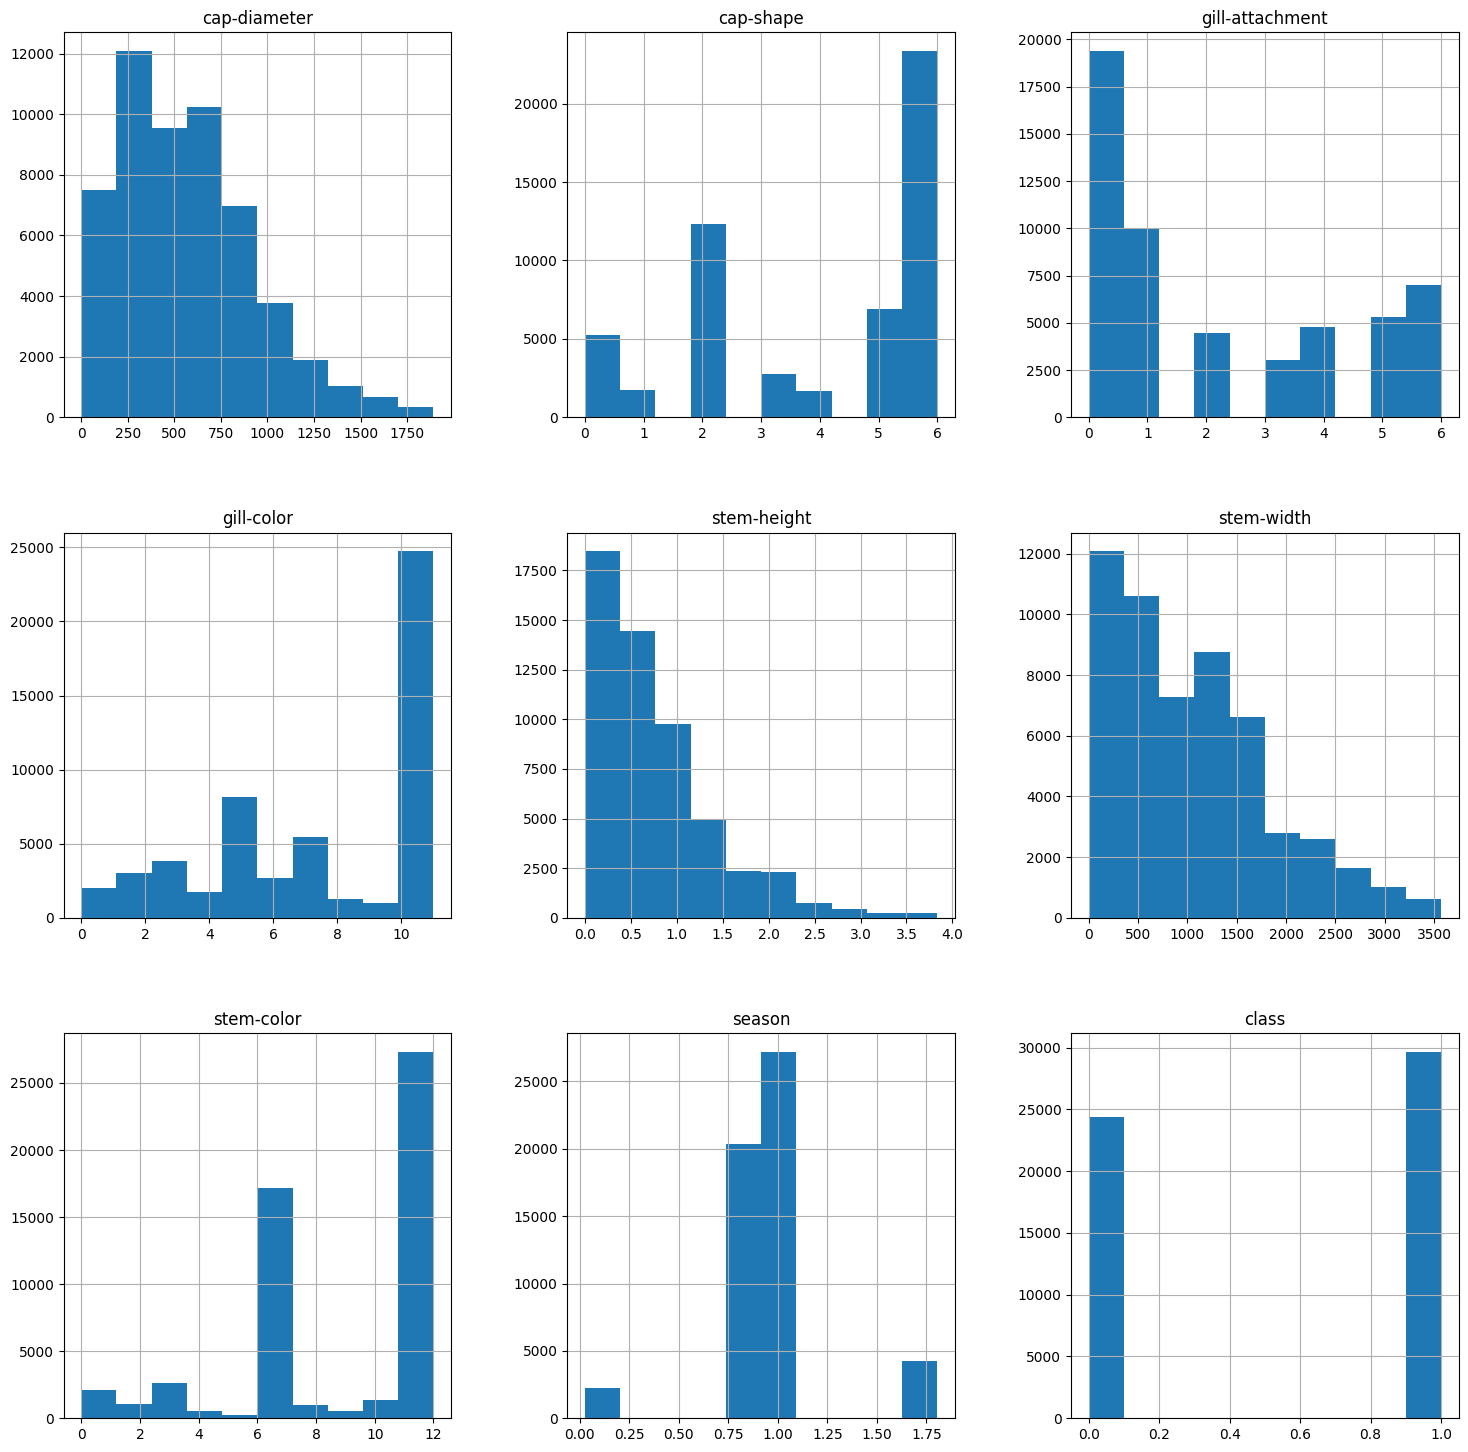

In [ ]:
all_data.hist(figsize=(18,18))

In [ ]:
all_data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
checkStandart(all_data, 'cap-diameter')

Statistic: 0.06603000105799428, p-value: 2.8359588090784317e-205
Распределение отличается от нормального (отклоняем H0)


In [ ]:
checkStandart(all_data, 'stem-width')

Statistic: 0.08947462078555507, p-value: 0.0
Распределение отличается от нормального (отклоняем H0)


In [ ]:
checkStandart(all_data, 'stem-height')

Statistic: 0.12191448540488353, p-value: 0.0
Распределение отличается от нормального (отклоняем H0)


In [ ]:
all_data['cap-shape'].value_counts()

,count
cap-shape,
6,23377
2,12294
5,6889
0,5273
3,2780
1,1722
4,1700


In [ ]:
all_data['gill-attachment'].value_counts()

,count
gill-attachment,
0,19405
1,10026
6,7001
5,5292
4,4795
2,4474
3,3042


In [ ]:
all_data['gill-color'].value_counts()

,count
gill-color,
10,16531
11,8214
5,8154
7,5455
3,3847
2,3042
6,2714
4,1772
8,1271


In [ ]:
all_data['stem-color'].value_counts()

,count
stem-color,
11,20317
6,15316
12,7017
3,2626
1,1918
7,1848
10,1393
2,1059
8,1025


In [ ]:
all_data['season'].value_counts()

,count
season,
0.943195,27210
0.888450,20387
1.804273,4219
0.027372,2219


In [ ]:
all_data['class'].value_counts()

,count
class,
1,29675
0,24360


### Подготовка к построению модели

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Разделите на признаки и целевую переменную
X = all_data.drop(columns=["class"])
y = all_data["class"]

In [ ]:
cat_features = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']
for cat in cat_features:
  X[cat] = X[cat].astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_test.value_counts()

,count
class,
1,5935
0,4872


In [ ]:
y_train.value_counts()

,count
class,
1,23740
0,19488


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43228 entries, 18466 to 48999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     43228 non-null  int64  
 1   cap-shape        43228 non-null  object 
 2   gill-attachment  43228 non-null  object 
 3   gill-color       43228 non-null  object 
 4   stem-height      43228 non-null  float64
 5   stem-width       43228 non-null  int64  
 6   stem-color       43228 non-null  object 
 7   season           43228 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.0+ MB


### Построение модели с помощью CatBoost (Дерево решений с градиентным бустингом)

In [ ]:
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features)
model = CatBoostClassifier()

In [ ]:
model.fit(train_data)

Learning rate set to 0.051452
0:	learn: 0.6637424	total: 169ms	remaining: 2m 48s
1:	learn: 0.6391010	total: 321ms	remaining: 2m 40s
2:	learn: 0.6154825	total: 469ms	remaining: 2m 35s
3:	learn: 0.5740042	total: 668ms	remaining: 2m 46s
4:	learn: 0.5236260	total: 794ms	remaining: 2m 37s
5:	learn: 0.4954608	total: 936ms	remaining: 2m 35s
6:	learn: 0.4717561	total: 1.1s	remaining: 2m 36s
7:	learn: 0.4538505	total: 1.29s	remaining: 2m 40s
8:	learn: 0.4332630	total: 1.47s	remaining: 2m 42s
9:	learn: 0.4146298	total: 1.64s	remaining: 2m 42s
10:	learn: 0.4023238	total: 1.84s	remaining: 2m 45s
11:	learn: 0.3894558	total: 1.96s	remaining: 2m 41s
12:	learn: 0.3787427	total: 2.08s	remaining: 2m 37s
13:	learn: 0.3693631	total: 2.25s	remaining: 2m 38s
14:	learn: 0.3562510	total: 2.42s	remaining: 2m 38s
15:	learn: 0.3482777	total: 2.58s	remaining: 2m 39s
16:	learn: 0.3393317	total: 2.71s	remaining: 2m 36s
17:	learn: 0.3291736	total: 2.86s	remaining: 2m 36s
18:	learn: 0.3195939	total: 3.02s	remaining: 

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Вычисляем метрики для обучающей выборки
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9919496622559453
F1 Score: 0.9926641089421983
Precision: 0.9935437589670014
Recall: 0.9917860151642797


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = model.predict_proba(X_train)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_train, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.9997483643618675
PR-AUC: 0.9997970277961612


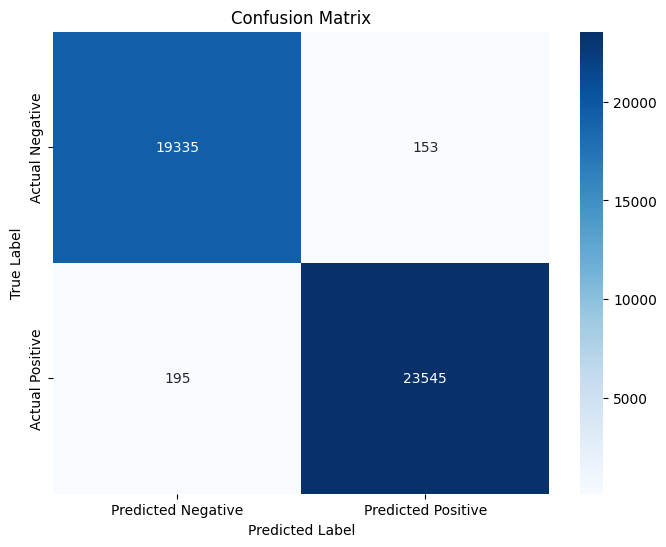

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)

# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

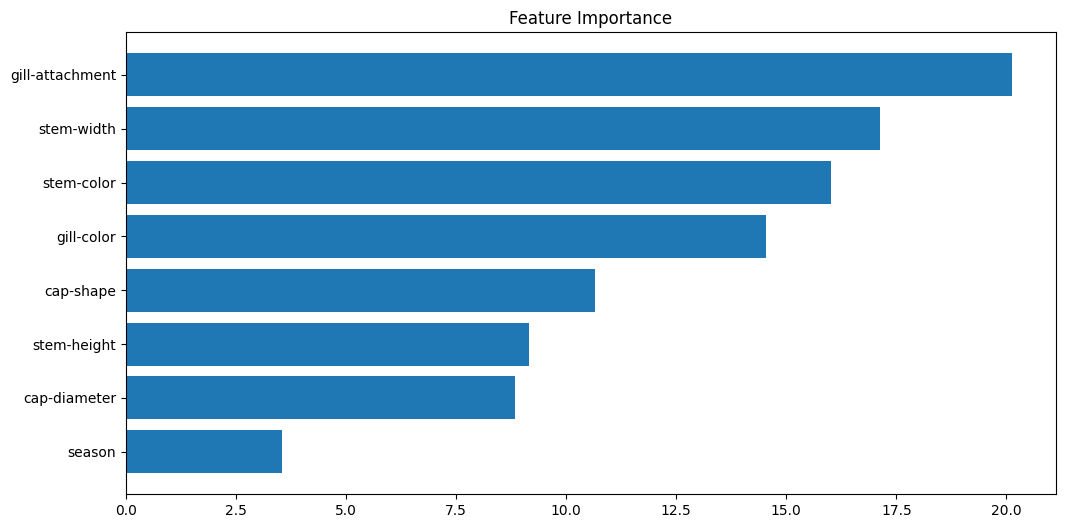

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
# Вычисляем метрики для тестовой выборки
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9875080966040529
F1 Score: 0.9886162408297495
Precision: 0.9895340985820391
Recall: 0.9877000842459983


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.9992434114510924
PR-AUC: 0.9993582891344017


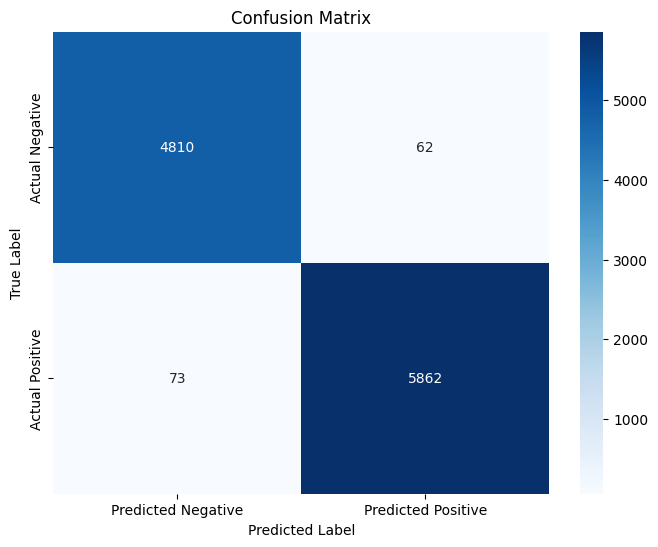

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Построение модели Naive Bayes

In [ ]:

from sklearn.naive_bayes import GaussianNB

for cat in cat_features:
  X = pd.get_dummies(X, cat,dtype=int)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
model = GaussianNB()

# Обучаем модель
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Делаем предсказания
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Вычисляем метрики для обучающей выборки
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.5972286480984547
F1 Score: 0.4937338257102149
Precision: 0.797108252746221
Recall: 0.35762426284751475


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = model.predict_proba(X_train)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_train, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.7664040442056322
PR-AUC: 0.7890053914168358


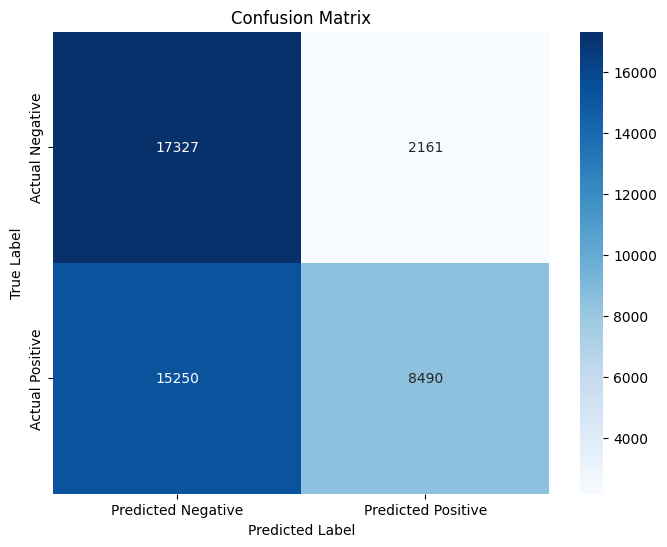

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)

# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Вычисляем метрики для тестовой выборки
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.589895438141945
F1 Score: 0.48524970963995356
Precision: 0.7809345794392524
Recall: 0.3519797809604044


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.7532506470618343
PR-AUC: 0.7737643404181056


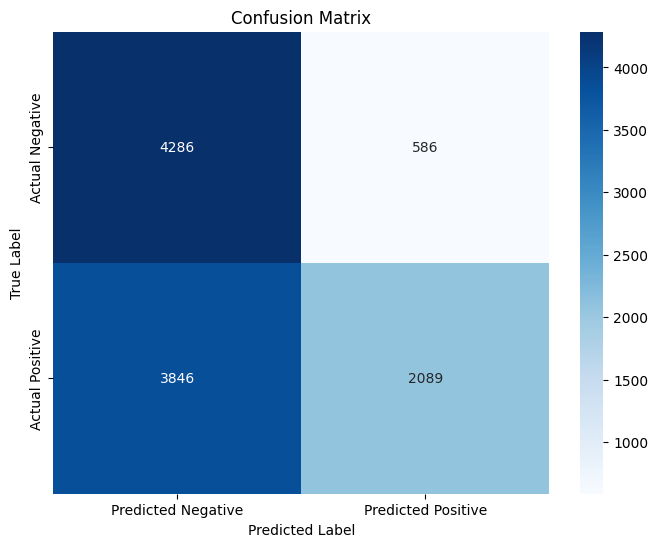

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

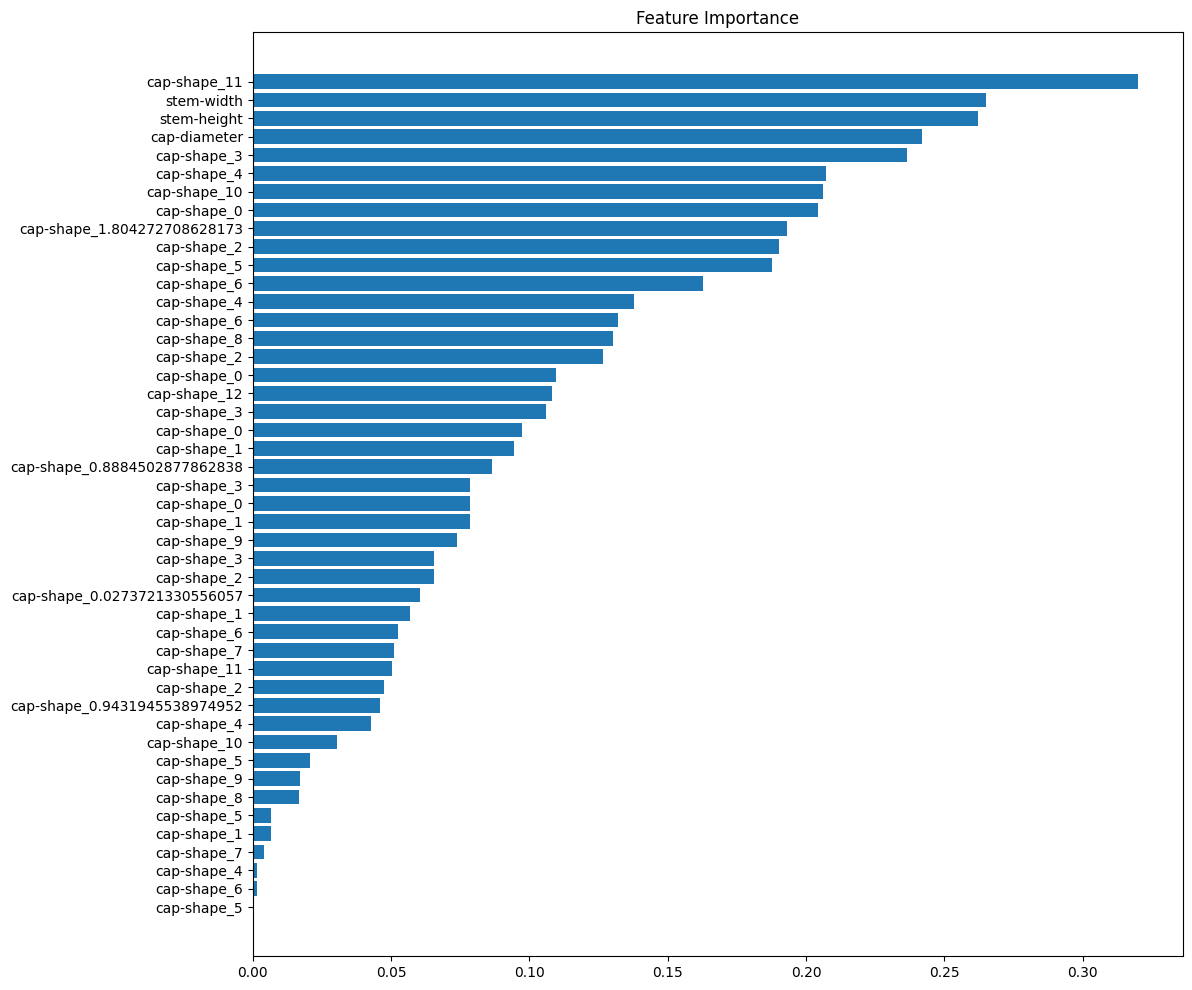

In [ ]:
# Средние значения и дисперсии для каждого класса
means = model.theta_  # Средние значения признаков
variances = model.var_  # Дисперсии признаков

feature_importances = np.abs(means[0] - means[1]) / np.sqrt(variances[0] + variances[1])
sorted_idx = np.argsort(feature_importances)
fig = plt.figure(figsize=(12, 12))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Можно заметить, насколько CatBoost лучше справляется с исходной задачей, но они и не удивительно, так как его алгоритм более сложен и заключается в обучении на собственнх ошибках. Высокие результаты могут быть объяснены переобучением модели, но эта гипотеза потребует дополнительных исследований. В нашей задаче, ошибка в сторону безопасного гриба будет менее критичной, чем ошибка в сторону ядовитого гриба, который может быть съеден, поэтому метрика recall более важная

Поменяем параметры GaussianNB

1. priors:
Этот параметр определяет априорные вероятности классов. Если не указать, то предполагается равновероятное распределение.

2. var_smoothing:
Этот параметр используется для сглаживания (регуляризации) дисперсии признаков. Он добавляет маленькое значение к дисперсии, чтобы избежать деления на очень маленькие или нулевые значения. Это помогает избежать числовых проблем, особенно в случае, когда признаки имеют очень маленькую дисперсию.


In [ ]:
model = GaussianNB(priors=[0.55, 0.45], var_smoothing=1e-6)

# Обучаем модель
model.fit(X_train, y_train)


GaussianNB(priors=[0.55, 0.45], var_smoothing=1e-06)

In [ ]:
# Делаем предсказания
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Вычисляем метрики для обучающей выборки
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.631627648746183
F1 Score: 0.5939205385831591
Precision: 0.7525526689931498
Recall: 0.4905223251895535


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = model.predict_proba(X_train)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_train, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.7027572062145602
PR-AUC: 0.7604014104048102


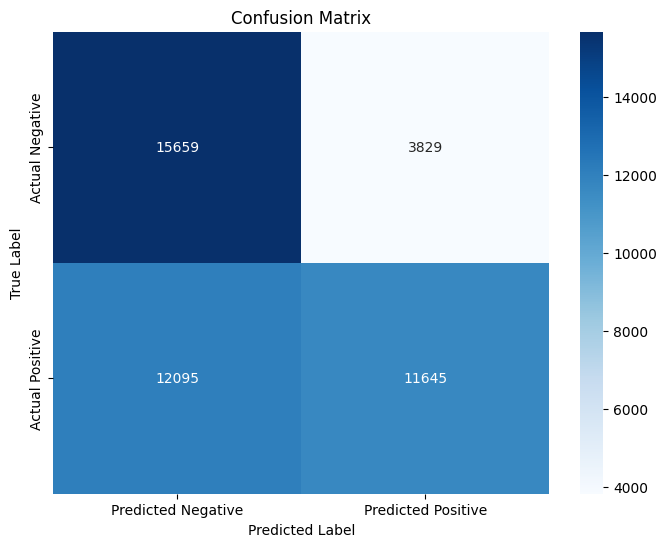

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)

# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Вычисляем метрики для тестовой выборки
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.6318127139816785
F1 Score: 0.5953422149903387
Precision: 0.7508978963571062
Recall: 0.4931760741364785


In [ ]:
# Получаем вероятности принадлежности к классу 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc}")

ROC-AUC: 0.7005023634530069
PR-AUC: 0.7571304182308035


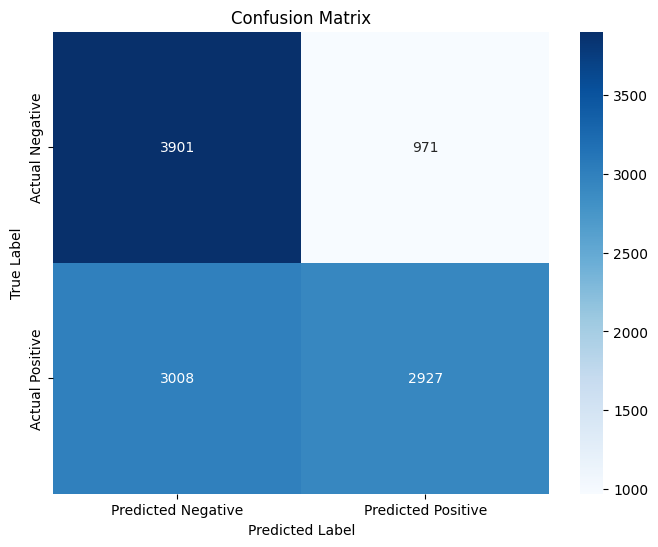

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Нам удалось немного лучшить результат модели, так как увелилися ее recall